# Digital Futures Academy Project: **Swan Teleco**

In [157]:
import pandas as pd, seaborn as sns, matplotlib.pyplot as plt, numpy as np

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler 
## Import the metrics we'll be using
from sklearn import metrics
## Import Logistic Regression from sklearn
from sklearn.linear_model import LogisticRegression

In [4]:
# Read the data into a Pandas DataFrame
swan = pd.read_excel("1 - Project Data.xlsx")

In [5]:
swan.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,Competitor had better devices


## **EDA**

### Check Data Types

In [28]:
swan.shape[0]

7043

In [30]:
swan.dtypes

CustomerID            object
Count                  int64
Country               object
State                 object
City                  object
Zip Code               int64
Lat Long              object
Latitude             float64
Longitude            float64
Gender                object
Senior Citizen        object
Partner               object
Dependents            object
Tenure Months          int64
Phone Service         object
Multiple Lines        object
Internet Service      object
Online Security       object
Online Backup         object
Device Protection     object
Tech Support          object
Streaming TV          object
Streaming Movies      object
Contract              object
Paperless Billing     object
Payment Method        object
Monthly Charges      float64
Total Charges         object
Churn Label           object
Churn Value            int64
Churn Reason          object
dtype: object

### Cleaning
* Redundant column removal
  * `Churn Label`
* Correcting data types
  * `Total Charges` --> object to float
* Null Value handling
  * Replace ' ' with 0 where `Total Charges == ' '`

In [33]:
((swan['Churn Label'] == 'No')&(swan['Churn Value'] == 0)).sum()

5174

In [35]:
swan.drop(columns = ['Churn Label'], inplace =True)

In [37]:
(swan['Total Charges'] == ' ').sum()

11

In [38]:
swan[swan['Total Charges'] == ' ']['Tenure Months']

2234    0
2438    0
2568    0
2667    0
2856    0
4331    0
4687    0
5104    0
5719    0
6772    0
6840    0
Name: Tenure Months, dtype: int64

In [40]:
swan['Total Charges'].replace(' ', 0, inplace=True)

/var/folders/gk/0ym9h57d05v80m40rlpbz2bm0000gq/T/ipykernel_76451/4219716417.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  swan['Total Charges'].replace(' ', 0, inplace=True)
/var/folders/gk/0ym9h57d05v80m40rlpbz2bm0000gq/T/ipykernel_76451/4219716417.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', T

In [43]:
swan['Total Charges'] = swan['Total Charges'].astype(float)

In [45]:
swan[swan['Total Charges'] == 0]

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Value,Churn Reason
2234,4472-LVYGI,1,United States,California,San Bernardino,92408,"34.084909, -117.258107",34.084909,-117.258107,Female,...,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,0.0,0,NaN
2438,3115-CZMZD,1,United States,California,Independence,93526,"36.869584, -118.189241",36.869584,-118.189241,Male,...,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,0.0,0,NaN
2568,5709-LVOEQ,1,United States,California,San Mateo,94401,"37.590421, -122.306467",37.590421,-122.306467,Female,...,No,Yes,Yes,Two year,No,Mailed check,80.85,0.0,0,NaN
2667,4367-NUYAO,1,United States,California,Cupertino,95014,"37.306612, -122.080621",37.306612,-122.080621,Male,...,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,0.0,0,NaN
2856,1371-DWPAZ,1,United States,California,Redcrest,95569,"40.363446, -123.835041",40.363446,-123.835041,Female,...,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,0.0,0,NaN
4331,7644-OMVMY,1,United States,California,Los Angeles,90029,"34.089953, -118.294824",34.089953,-118.294824,Male,...,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,0.0,0,NaN
4687,3213-VVOLG,1,United States,California,Sun City,92585,"33.739412, -117.173334",33.739412,-117.173334,Male,...,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,0.0,0,NaN
5104,2520-SGTTA,1,United States,California,Ben Lomond,95005,"37.078873, -122.090386",37.078873,-122.090386,Female,...,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,0.0,0,NaN
5719,2923-ARZLG,1,United States,California,La Verne,91750,"34.144703, -117.770299",34.144703,-117.770299,Male,...,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,0.0,0,NaN
6772,4075-WKNIU,1,United States,California,Bell,90201,"33.970343, -118.171368",33.970343,-118.171368,Female,...,Yes,Yes,No,Two year,No,Mailed check,73.35,0.0,0,NaN


### Train-Test Split

In [48]:
feature_cols = list(swan.columns)
feature_cols.remove('Churn Value')

X = swan[feature_cols]
y = swan['Churn Value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [50]:
(X_train.index != y_train.index).sum()

0

### Explore Target

In [53]:
train = X_train.copy()
train['Churn Value'] = y_train.copy()


In [55]:
train['Churn Value'].value_counts(normalize = True)

Churn Value
0    0.739262
1    0.260738
Name: proportion, dtype: float64

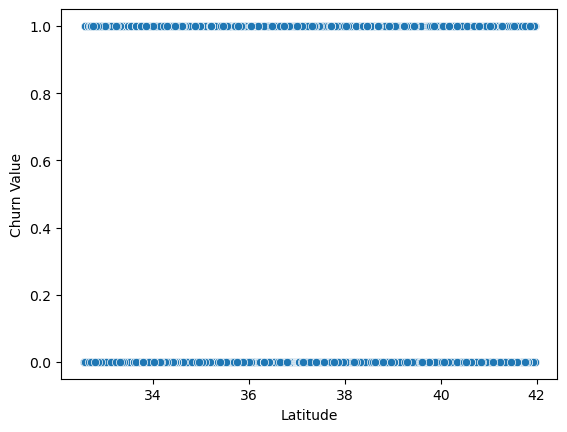

In [57]:
sns.scatterplot(data=train, x='Latitude', y='Churn Value')
plt.show()

### Churner Demographic

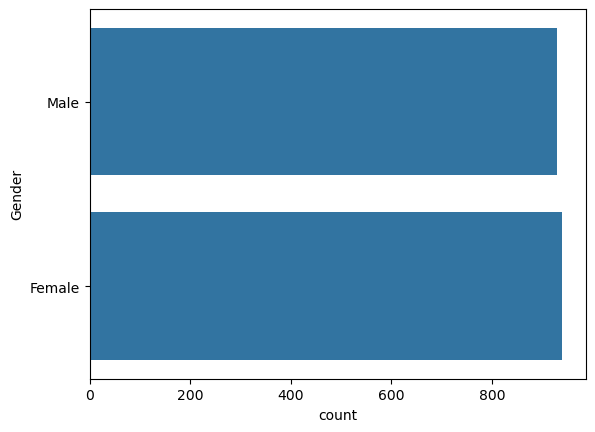

In [60]:
sns.countplot(swan[swan['Churn Value']==1]['Gender'])
plt.show()

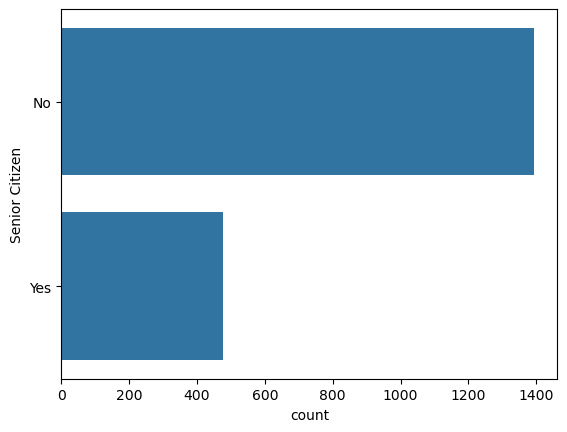

In [61]:
sns.countplot(swan[swan['Churn Value']==1]['Senior Citizen'])
plt.show()

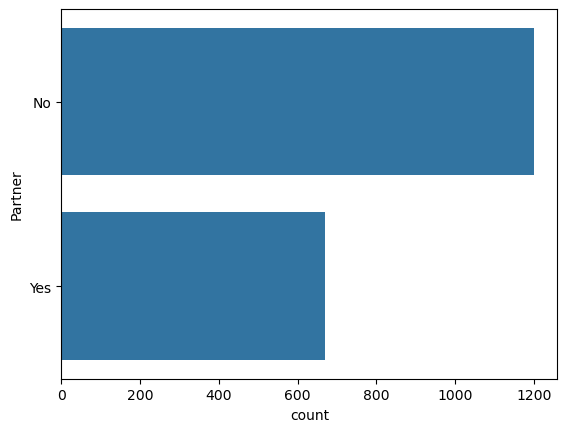

In [62]:
sns.countplot(swan[swan['Churn Value']==1]['Partner'])
plt.show()

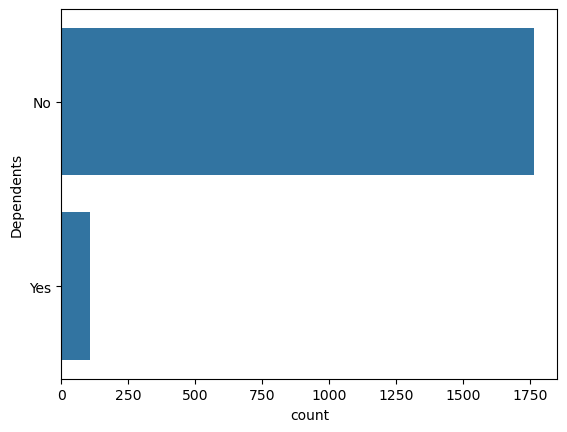

In [63]:
sns.countplot(swan[swan['Churn Value']==1]['Dependents'])
plt.show()

### Finding relationships

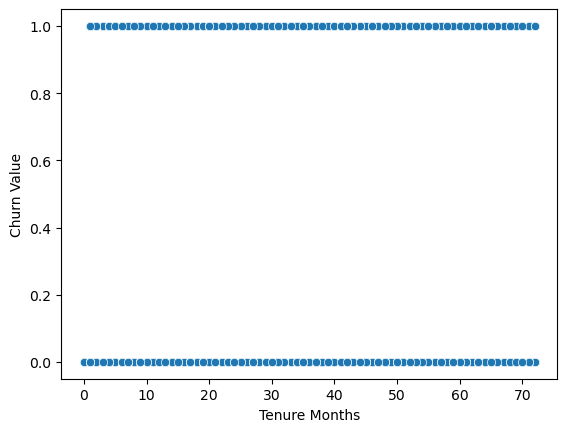

In [66]:
sns.scatterplot(train, x='Tenure Months', y='Churn Value')
plt.show()

## **Feature Engineering**

### To-Do:

* Drop from Feature List: `CustomerID`,`Count`,`Country`,`State`,`City`,`Zip Code`,`Lat Long`,`Churn Reason`
* Boolean Label Encode: `Gender`,`Senior Citizen`,`Partner`,`Dependents`,`Phone Service`,`Paperless Billing`,`Multiple Lines`,`Online Security`,`Online Backup`,`Device Protection`,`Tech Support`,`Streaming TV`,`Streaming Movies`
* Order Label Encode: `Contract`
* One-Hot Encode: `Internet Service`,`Payment Method`
* Feature Scaling: Max-Min Scale every feature

In [77]:
def bool_labeling(df, col_name):
    df = df.copy()
    col = df[col_name].replace({r'^No.*':0,'Yes':1,0:0,1:1}, regex=True)
    return col

In [79]:
def gender_labeling(df, col_name):
    df = df.copy()
    col = df[col_name].replace({'Male':0,'Female':1,0:0,1:1})
    return col

In [81]:
def contract_labeling(df, col_name):
    df=df.copy()
    col = df[col_name].replace({'One year':12,'Month-to-month':1,'Two year':24})
    return col

In [83]:
def ohe(df, col_name):
    df=df.copy()
    df=pd.get_dummies(df, columns = [f'{col_name}'], prefix = f'{col_name}', drop_first = True, dtype='int')
    return df

In [164]:
def feature_engineering(df):
    df=df.copy()
    
    df.drop(columns=['CustomerID','Count','Country','State','City','Zip Code','Lat Long','Churn Reason'],inplace = True)

    for col_name in ['Senior Citizen','Partner','Dependents','Phone Service','Paperless Billing','Multiple Lines',
                     'Online Security','Online Backup','Device Protection','Tech Support','Streaming TV',
                     'Streaming Movies']:
        df[col_name] = bool_labeling(df, col_name)

    df['Gender'] = gender_labeling(df, 'Gender')

    df['Contract'] = contract_labeling(df, 'Contract')

    df = ohe(df,'Internet Service')
    df = ohe(df,'Payment Method')

    return df
    

In [174]:
X_train_fe = feature_engineering(X_train)

/var/folders/gk/0ym9h57d05v80m40rlpbz2bm0000gq/T/ipykernel_76451/2918864045.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  col = df[col_name].replace({r'^No.*':0,'Yes':1,0:0,1:1}, regex=True)


In [176]:
train_minmax = MinMaxScaler() ## Initialise scaler
train_minmax.fit(X_train_fe)

MinMaxScaler()

In [178]:
def max_min(df):
    global train_minmax
    df=df.copy()
    df = train_minmax.transform(df)
    return df

In [210]:
X_train_fe_scaled = pd.DataFrame(max_min(X_train_fe), index = X_train_fe.index, columns = X_train_fe.columns)

In [206]:
X_train_fe_scaled.head()

,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Online Security,...,Streaming Movies,Contract,Paperless Billing,Monthly Charges,Total Charges,Internet Service_Fiber optic,Internet Service_No,Payment Method_Credit card (automatic),Payment Method_Electronic check,Payment Method_Mailed check
2142,0.026273,0.719622,0.0,0.0,1.0,0.0,0.986111,1.0,1.0,0.0,...,1.0,0.478261,1.0,0.801196,0.801728,1.0,0.0,1.0,0.0,0.0
1623,0.562589,0.377385,1.0,0.0,0.0,0.0,0.222222,1.0,0.0,0.0,...,1.0,0.000000,1.0,0.746886,0.181202,1.0,0.0,1.0,0.0,0.0
6074,0.207249,0.627822,1.0,0.0,0.0,0.0,0.444444,1.0,1.0,0.0,...,1.0,0.478261,1.0,0.855007,0.393429,1.0,0.0,1.0,0.0,0.0
1362,0.162030,0.618756,1.0,1.0,1.0,0.0,0.333333,0.0,0.0,0.0,...,1.0,0.000000,1.0,0.223219,0.107464,0.0,0.0,1.0,0.0,0.0
6754,0.152314,0.590326,1.0,0.0,1.0,1.0,0.277778,1.0,0.0,0.0,...,0.0,0.000000,0.0,0.017937,0.046754,0.0,1.0,0.0,0.0,1.0


## **Modeling**

In [190]:
lr = LogisticRegression(max_iter=300, random_state=10)

In [192]:
lr.fit(X_train_fe_scaled, y_train)

LogisticRegression(max_iter=300, random_state=10)

In [194]:
results = pd.DataFrame()
results[['prob_stay', 'prob_leave']] = lr.predict_proba(X_train_fe_scaled)

In [196]:
results['y_pred'] = np.where(results['prob_leave']>.5, 1, 0)

In [198]:
def get_results(actual, predicted):
    print("The confusion matrix for your predictions is:")
    print(metrics.confusion_matrix(actual, predicted), "\n")
    print(f'The accuracy of your model is: {metrics.accuracy_score(actual, predicted)}')
    print(f'The recall of your model is: {metrics.recall_score(actual, predicted)}')
    print(f'The precision of your model is: {metrics.precision_score(actual, predicted)}')
    print(f'The F1-score of your model is: {metrics.f1_score(actual, predicted)}')

In [200]:
get_results(y_train, results['y_pred'])

The confusion matrix for your predictions is:
[[3758  407]
 [ 625  844]] 

The accuracy of your model is: 0.8168264110756124
The recall of your model is: 0.5745405037440435
The precision of your model is: 0.6746602717825739
The F1-score of your model is: 0.6205882352941177


## **Evaluation**

In [208]:
X_test_fe = feature_engineering(X_test)

/var/folders/gk/0ym9h57d05v80m40rlpbz2bm0000gq/T/ipykernel_76451/2918864045.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  col = df[col_name].replace({r'^No.*':0,'Yes':1,0:0,1:1}, regex=True)


In [212]:
X_test_fe_scaled = pd.DataFrame(max_min(X_test_fe), index = X_test_fe.index, columns = X_test_fe.columns)

In [214]:
results_test = pd.DataFrame()
results_test[['prob_stay', 'prob_leave']] = lr.predict_proba(X_test_fe_scaled)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [216]:
results_test['y_pred'] = np.where(results_test['prob_leave']>.5, 1, 0)

In [218]:
get_results(y_test, results_test['y_pred'])

The confusion matrix for your predictions is:
[[901 108]
 [168 232]] 

The accuracy of your model is: 0.8041163946061036
The recall of your model is: 0.58
The precision of your model is: 0.6823529411764706
The F1-score of your model is: 0.6270270270270271
